Kmeans
Hirarki
DBSCAN

# Preprocessing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('Iris.csv')
#  Tampilkan 5 data pertama
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# hapus atribut yang tidak digunakan
df.drop(['Species','Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(150, 4)

In [7]:
df_scale[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [8]:
data = pd.DataFrame(df_scale)
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

data_cluster = data.copy()
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [ ]:
# data = df.copy()
# data_cluster = df.copy()

# K-means

Text(0, 0.5, 'Inertia')

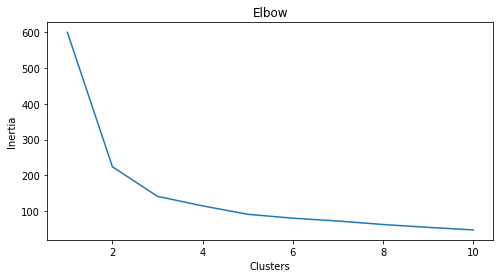

In [10]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [11]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4
0,-0.900681,1.032057,-1.341272,-1.312977,1,3
1,-1.143017,-0.124958,-1.341272,-1.312977,1,1
2,-1.385353,0.337848,-1.398138,-1.312977,1,1
3,-1.506521,0.106445,-1.284407,-1.312977,1,1
4,-1.021849,1.263460,-1.341272,-1.312977,1,3
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,2
146,0.553333,-1.281972,0.705893,0.922064,2,0
147,0.795669,-0.124958,0.819624,1.053537,0,2
148,0.432165,0.800654,0.933356,1.447956,0,2


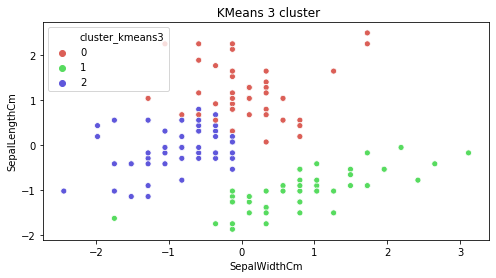

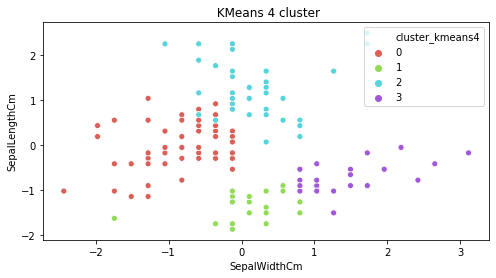

In [14]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

# Hierarchy

In [15]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [16]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [17]:
## Single Linkage

# In single linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the shortest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to
# the left is equal to the length of the arrow between their two closest points.

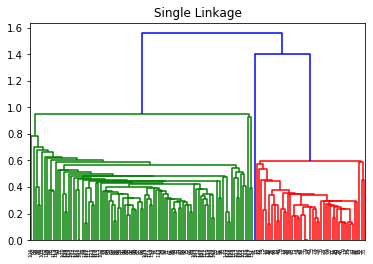

In [18]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

In [19]:
## Complete Linkage

# In complete linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the longest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to the 
# left is equal to the length of the arrow between their two furthest points. 

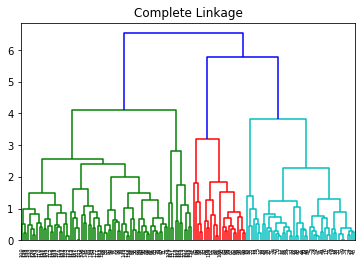

In [20]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [21]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,-0.900681,1.032057,-1.341272,-1.312977,1,3,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,1,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,1,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,1,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,3,0
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,2,2
146,0.553333,-1.281972,0.705893,0.922064,2,0,2
147,0.795669,-0.124958,0.819624,1.053537,0,2,2
148,0.432165,0.800654,0.933356,1.447956,0,2,2


Text(0.5, 1.0, ' Hierarchical Clustering')

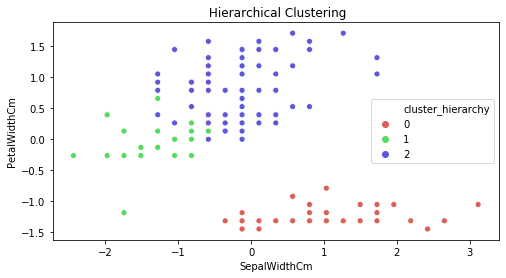

In [23]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['PetalWidthCm'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [40]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [41]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,-0.900681,1.032057,-1.341272,-1.312977,1,3,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,3,0,0
...,...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,2,2,1
146,0.553333,-1.281972,0.705893,0.922064,2,0,2,1
147,0.795669,-0.124958,0.819624,1.053537,0,2,2,1
148,0.432165,0.800654,0.933356,1.447956,0,2,2,1


In [42]:
data_cluster.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16,1.026667,1.280000,1.186667,0.573333
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.818795,1.147627,0.900311,0.594682
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000,0.000000,0.000000,-1.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000,0.000000,0.000000,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000,1.000000,2.000000,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000,2.000000,2.000000,1.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, ' DBSCAN clustering')

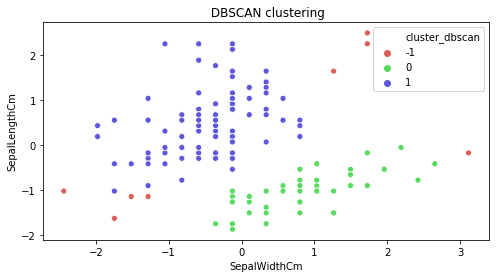

In [43]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')

# SOM